The data used to compile datasets in this demo as well as the pre-compiled dataset used in the backdrop paper are provided on Zenodo (https://zenodo.org/record/1252464). To use, download an unzip in the working directory.

In [1]:
from GP_create import *

### The GP generator works via defining a subpatch and a patch as follows.

In [2]:
# Define the subpatches
subpatch = generate_patch(size = 20, corr_length = 3, upscale_factor=2, subpatch=None,
               wrap = True, test=False, wrap_factor = 1, envelope = True)

# Define the full patch 
patch = generate_patch(size = 120, corr_length = None, upscale_factor=1, subpatch=subpatch,
               wrap = True,  test=False, wrap_factor = 1.25,  envelope = False)

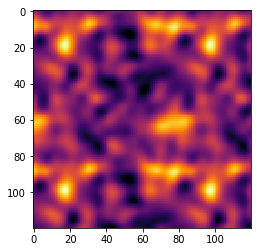

In [3]:
# Calling the generator for the patch.
sample, size = patch.generate()

plt.imshow(sample, cmap = 'inferno' )
plt.show()

### For samples of size 1024, there is a helper function. 

##### (Can also call the GP_create.py directly with python GP_create.py --help for details.


In [ ]:
# e.g. Generate 2 1024x1024 samples with blob size of diameter 250.
# The location of the save file is specified in GP_create as sample_folder
# This line can take a lot of time to execute, just for demonstration.

gentex(250, test = False, start = 1, n = 2)

##### The generated samples are saved in gp-samples.

### After generating the GP samples, we call the following functions to create the database classes.

The samples used in the demonstration are provided on Zenodo (https://zenodo.org/record/1252464 under samples.zip). 

In [4]:
# To see which GP sizes are available in the folder /gp-samples:
look_for_GPs()

The available sizes and correlations are: [1024] and [9.5, 10, 60, 80, 140, 200].


Found 50 samples with correlation length 9.5.
Found 50 samples with correlation length 10.
Found 4 samples with correlation length 60.
Found 50 samples with correlation length 80.
Found 50 samples with correlation length 140.
Found 4 samples with correlation length 200.
--------------------------------------------------------------------------------
The deviation from having mean zero and std one is 4.1735457998641826e-14.
--------------------------------------------------------------------------------
Plotting the 1024x1024 samples...



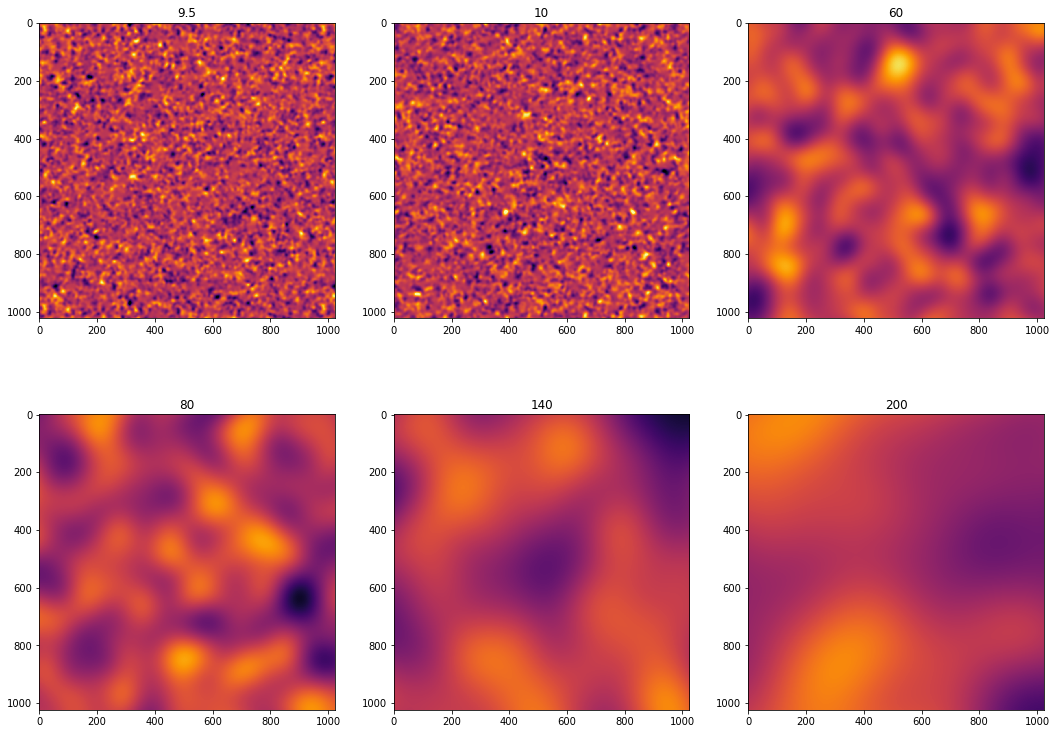



Created 8 cross sets with 1 samples per class. 

Plotting the generated 1024x1024 samples...



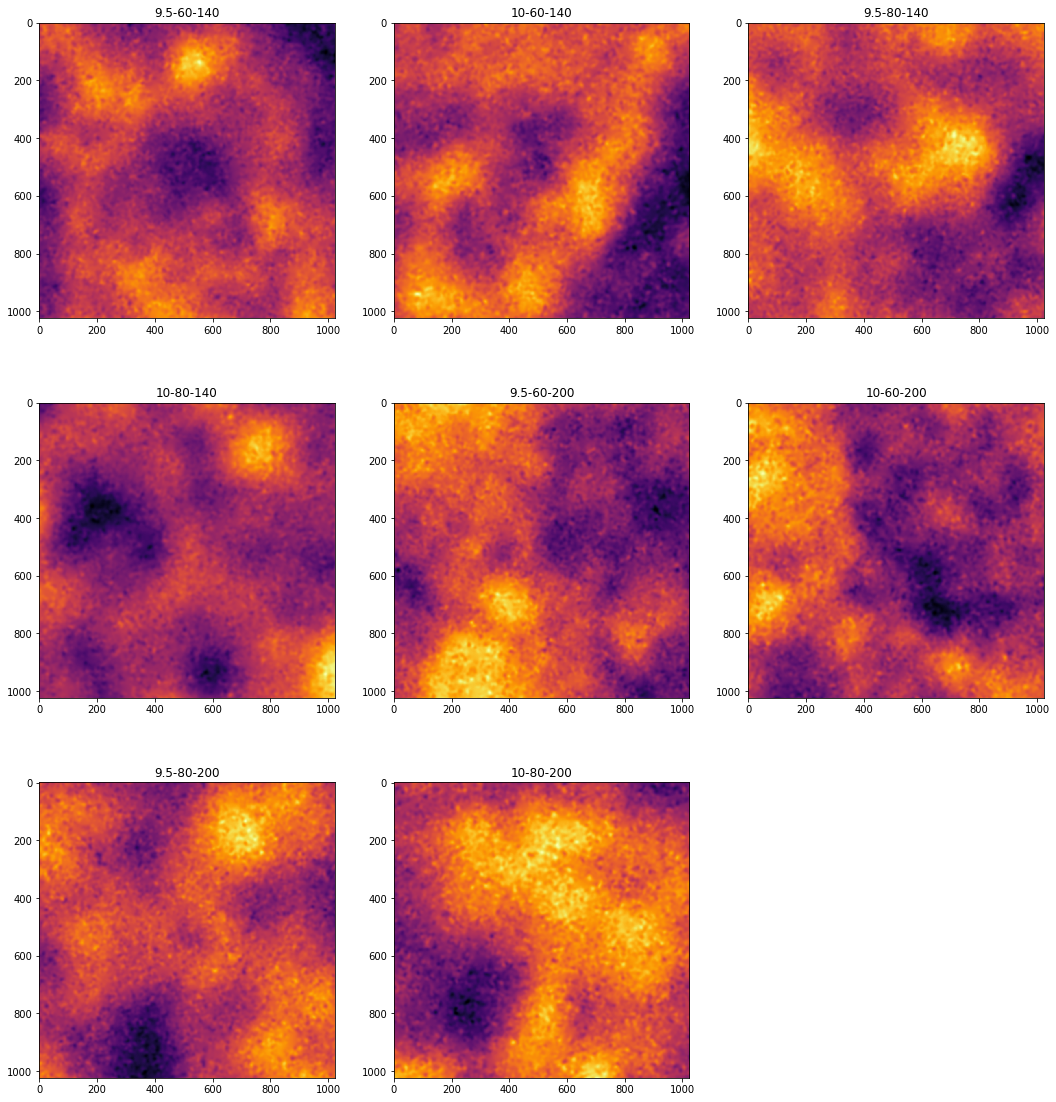

In [5]:
# To generate a dataset with 3 hierarchies given by S = 0.5 S1 + 1 * S2 + 2 * S3 where S1,S2,S3 are in [9.5,10],[60,80],[140,200]:
my_cross = GP_cross(size=1024, corr_classes=[[9.5,10],[60,80],[140,200]], power=[0.5,1,2])

In [6]:
# To write the cross to file:
# The location of the save file is specified in GP_create as cross_folder
# The data is pickled and written as a  ([data,label], class names) tuple.
# To read just load file and unpickle.

my_cross.write_to_file()

Written to file gp-crosses/GP_9.5-10+60-80+140-200.gp.


### The dataset from the paper

The dataset is provided on Zenodo (https://zenodo.org/record/1252464 under dataset.zip). To generate it from the samples, use the following procedure.

Found 50 samples with correlation length 9.5.
Found 50 samples with correlation length 10.
Found 50 samples with correlation length 80.
Found 50 samples with correlation length 140.
--------------------------------------------------------------------------------
The deviation from having mean zero and std one is 3.991746779581813e-14.
--------------------------------------------------------------------------------
Plotting the 1024x1024 samples...



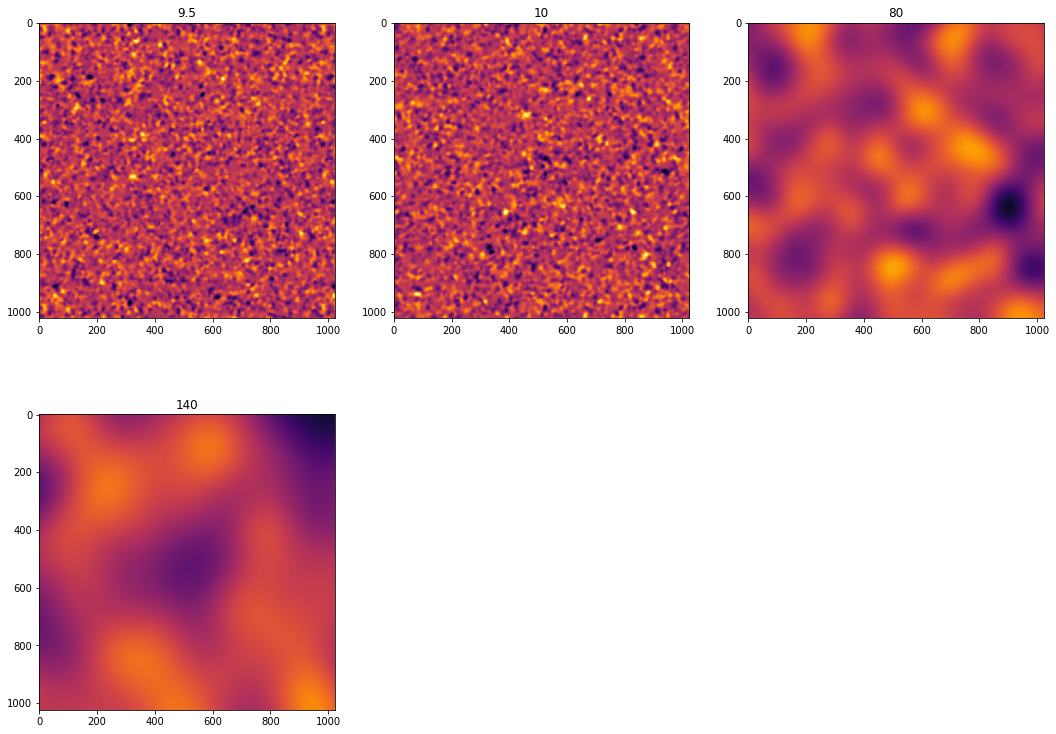



Created 4 cross sets with 25 samples per class. 

Plotting the generated 1024x1024 samples...



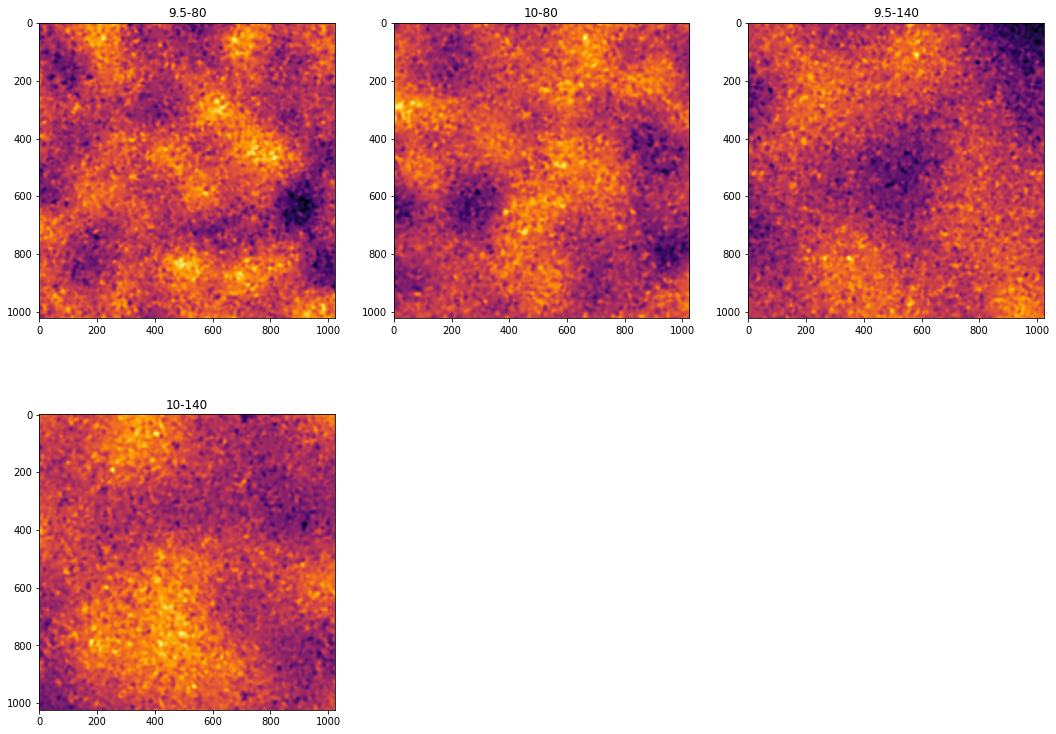

Written to file gp-crosses/GP_9.5-10+80-140.gp.


In [7]:
# The individual samples for dataset used in the paper are provided. 
# To build that specific dataset use:

my_cross = GP_cross(size=1024, corr_classes=[[9.5,10],[80,140]], power=[0.75,1.25])

my_cross.write_to_file()

In [8]:
# To load the dataset, just open the file and unpickle:

with open('gp-crosses/GP_9.5-10+80-140.gp','rb') as ds: 
            my_dataset, class_dict = pickle.load(ds)
        
# The classes are:
print(class_dict)

{0: '9.5-80', 1: '10-80', 2: '9.5-140', 3: '10-140'}


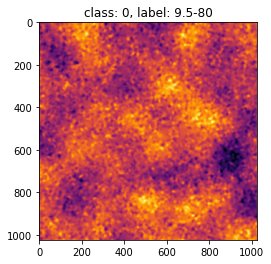

In [9]:
sample_data, sample_class = my_dataset[0]

plt.imshow(sample_data, cmap='inferno')
plt.title('class: {}, label: {}' .format(sample_class, class_dict[sample_class]))
plt.show()